# AUC and FPR at $\alpha$ TPR

## Mean of the results accross all datasets

In [16]:
import pandas as pd

df = pd.read_csv('AUC_FPR-at-alpha-TPR_results.csv')


# Group by model and compute mean of each metric
summary = df.groupby(['model']).agg({
    # 'fit_time_s'   : 'mean',
    'roc_auc'      : 'mean',
    'fpr@70tpr'    : 'mean',
    'fpr@75tpr'    : 'mean',
    'fpr@80tpr'    : 'mean',
    'fpr@85tpr'    : 'mean',
    'fpr@90tpr'    : 'mean',
    'fpr@95tpr'    : 'mean',
}).round(3)

# Sort by column, e.g. roc_auc
summary = summary.sort_values(['roc_auc'], ascending=False)
summary.to_csv('summary.csv')
summary


,roc_auc,fpr@70tpr,fpr@75tpr,fpr@80tpr,fpr@85tpr,fpr@90tpr,fpr@95tpr
model,,,,,,,
HdLOF-2l,0.720,0.384,0.428,0.478,0.539,0.612,0.700
CBLOF,0.702,0.410,0.456,0.507,0.566,0.634,0.728
LOF,0.690,0.425,0.479,0.538,0.616,0.698,0.792
HdLOF,0.689,0.421,0.478,0.542,0.615,0.705,0.806
HdLOF-E,0.687,0.428,0.486,0.549,0.628,0.711,0.811
HdLOF-E2,0.685,0.432,0.489,0.551,0.630,0.714,0.814
IForest,0.681,0.435,0.478,0.529,0.588,0.653,0.754
ECOD,0.677,0.443,0.486,0.533,0.589,0.657,0.752
COPOD,0.668,0.453,0.500,0.546,0.600,0.671,0.759


## Results per-datasets

In [20]:
summary_per_dataset = (df.groupby(['dataset','model',])
      .agg({
          'roc_auc'      : 'mean',
          'fpr@70tpr'    : 'mean',
          'fpr@75tpr'    : 'mean',
          'fpr@80tpr'    : 'mean',
          'fpr@85tpr'    : 'mean',
          'fpr@90tpr'    : 'mean',
          'fpr@95tpr'    : 'mean',
      })
      .round(3)
      # .reset_index()
)
summary_per_dataset = summary_per_dataset.sort_values(['dataset','roc_auc'], ascending=False)
summary_per_dataset

roc_auc  fpr@70tpr  fpr@75tpr  fpr@80tpr  fpr@85tpr  \
dataset model                                                           
yelp    HdLOF-2l    0.676      0.450      0.495      0.537      0.605   
        LOF         0.667      0.461      0.516      0.564      0.645   
        HdLOF       0.660      0.458      0.509      0.594      0.677   
        HdLOF-E2    0.656      0.480      0.538      0.590      0.661   
        HdLOF-E     0.655      0.480      0.539      0.592      0.657   
...                   ...        ...        ...        ...        ...   
20news  HdLOF-2l    0.572      0.600      0.660      0.706      0.755   
        IForest     0.567      0.611      0.664      0.713      0.765   
        ECOD        0.561      0.630      0.669      0.709      0.775   
        COPOD       0.550      0.632      0.687      0.723      0.777   
        HBOS        0.550      0.629      0.675      0.720      0.792   

                  fpr@90tpr  fpr@95tpr  
dataset model                           
yelp    HdLOF-2l      0.673      0.761  
        LOF           0.737      0.842  
        HdLOF         0.747      0.858  
        HdLOF-E2      0.758      0.848  
        HdLOF-E       0.760      0.848  
...                     ...        ...  
20news  HdLOF-2l      0.852      0.944  
        IForest       0.802      0.892  
        ECOD          0.828      0.888  
        COPOD         0.827      0.895  
        HBOS          0.835      0.910  

[150 rows x 7 columns]

# Census Fit Time 

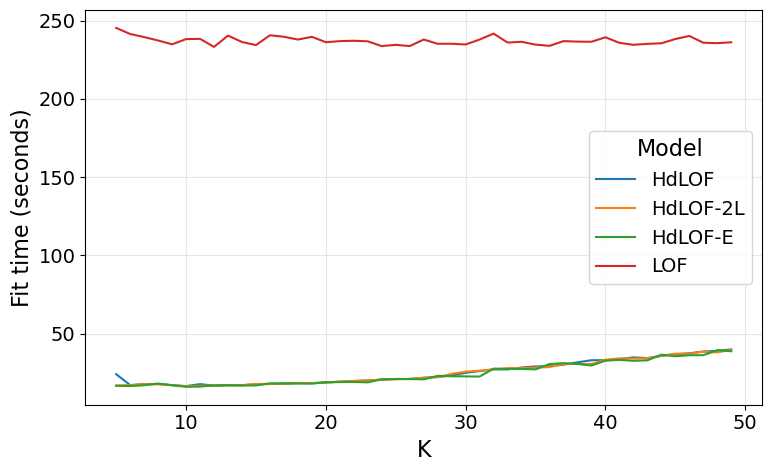

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 16,            # base font size for text
    'axes.titlesize': 18,       # title
    'axes.labelsize': 16,       # x/y labels
    'xtick.labelsize': 14,      # x‐tick labels
    'ytick.labelsize': 14,      # y‐tick labels
    'legend.fontsize': 14,      # legend text
    'legend.title_fontsize': 16,# legend title
})

csv_path = 'Census_fit_time.csv'
df = pd.read_csv(csv_path)

# Pivot so each model becomes its own column, indexed by k
pivot = df.pivot(index='k', columns='model', values='fit_time_s')

# Plot
plt.figure(figsize=(8, 5))
for model in pivot.columns:
    plt.plot(pivot.index, pivot[model], label=model)

plt.xlabel('K')   
plt.ylabel('Fit time (seconds)')
plt.legend(title='Model')
plt.grid(alpha=0.3)
plt.tight_layout()

# Save or show
plt.savefig('fit_time_vs_k_census.pdf', dpi=400, bbox_inches='tight')
plt.show()
